In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Online Retail.csv")

In [3]:
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

           InvoiceDate  UnitPrice  CustomerID         Country  
0        01

In [4]:
print(data.shape)

(541909, 8)


In [5]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

     InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-10 8:26       2.55     17850.0  United Kingdom  
1  01-12-10 8:26       3.39     17850.0  United Kingdom  
2  01-12-10 8:26       2.75     17850.0  United Kingdom  
3  01-12-10 8:26       3.39     17850.0  United Kingdom  
4  01-12-10 8:26       3.39     17850.0  United Kingdom  


In [6]:
print(data.tail())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

           InvoiceDate  UnitPrice  CustomerID Country  
541904  09-12-11 12:50       0.85     12680.0  France  
541905  09-12-11 12:50       2.10     12680.0  France  
541906  09-12-11 12:50       4.15     12680.0  France  
541907  09-12-11 12:50       4.15     12680.0  France  
541908  09-12-11 12:50       4.95     12680.0  France  


In [7]:
# Drop missing values and remove negative values
data.dropna(subset=["InvoiceNo", "StockCode", "Description", "CustomerID"], inplace=True)
data = data[(data["Quantity"] > 0) & (data["UnitPrice"] > 0)]

In [8]:
# Convert InvoiceNo to string
data["InvoiceNo"] = data["InvoiceNo"].astype(str)

In [11]:
# Extract transactions (grouping items by InvoiceNo)
transactions = data.groupby("InvoiceNo")["Description"].apply(list).tolist()

In [12]:
print(transactions[:5])

[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


In [16]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.3.1 from https://files.pythonhosted.org/packages/9f/71/34ddbd21f1da67c7a768146968b4d0220ee6831e4bcbad3e03dd3eae88b6/scikit_learn-1.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.4 MB 3.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 4.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 4.4 MB/s eta

In [13]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [20]:
# Convert transactions into a format suitable for FP-Growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [21]:
# Apply FP-Growth Algorithm
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

In [22]:
# Display frequent itemsets
print(frequent_itemsets)

      support                                           itemsets
0    0.106357               (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.017321                   (RED WOOLLY HOTTIE WHITE HEART.)
2    0.017213              (KNITTED UNION FLAG HOT WATER BOTTLE)
3    0.016026                     (SET 7 BABUSHKA NESTING BOXES)
4    0.013005                   (CREAM CUPID HEARTS COAT HANGER)
..        ...                                                ...
968  0.010792  (LUNCH BAG  BLACK SKULL., LUNCH BAG VINTAGE DO...
969  0.010253  (LUNCH BAG SPACEBOY DESIGN , LUNCH BAG VINTAGE...
970  0.010199  (LUNCH BAG SUKI DESIGN , LUNCH BAG VINTAGE DOI...
971  0.011763  (LOVE HOT WATER BOTTLE, HOT WATER BOTTLE KEEP ...
972  0.010954  (HAND WARMER RED LOVE HEART, HAND WARMER OWL D...

[973 rows x 2 columns]


In [23]:
from mlxtend.frequent_patterns import association_rules

In [24]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [25]:
# Display the top 5 rules
print(rules.head())

                       antecedents                           consequents  \
0         (HAND WARMER UNION JACK)              (HAND WARMER OWL DESIGN)   
1         (HAND WARMER OWL DESIGN)              (HAND WARMER UNION JACK)   
2         (HAND WARMER UNION JACK)       (HAND WARMER SCOTTY DOG DESIGN)   
3  (HAND WARMER SCOTTY DOG DESIGN)              (HAND WARMER UNION JACK)   
4       (HOME BUILDING BLOCK WORD)  (WHITE HANGING HEART T-LIGHT HOLDER)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.023797            0.030866  0.011278    0.473923  15.354439   
1            0.030866            0.023797  0.011278    0.365385  15.354439   
2            0.023797            0.025415  0.010253    0.430839  16.951822   
3            0.025415            0.023797  0.010253    0.403397  16.951822   
4            0.037287            0.106357  0.011278    0.302460   2.843832   

   representativity  leverage  conviction  zhangs_metric   jaccard  certai

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Prepare dataset for ML (features: antecedent size, consequent size, support, lift)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
X = rules[["antecedent_len", "consequent_len", "support", "lift"]]
y = (rules["confidence"] > 0.5).astype(int)  # Label: High confidence (1) or Low confidence (0)

In [28]:
# Split data - training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.79


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Get the top 10 purchased products
top_products = data["Description"].value_counts().head(10)

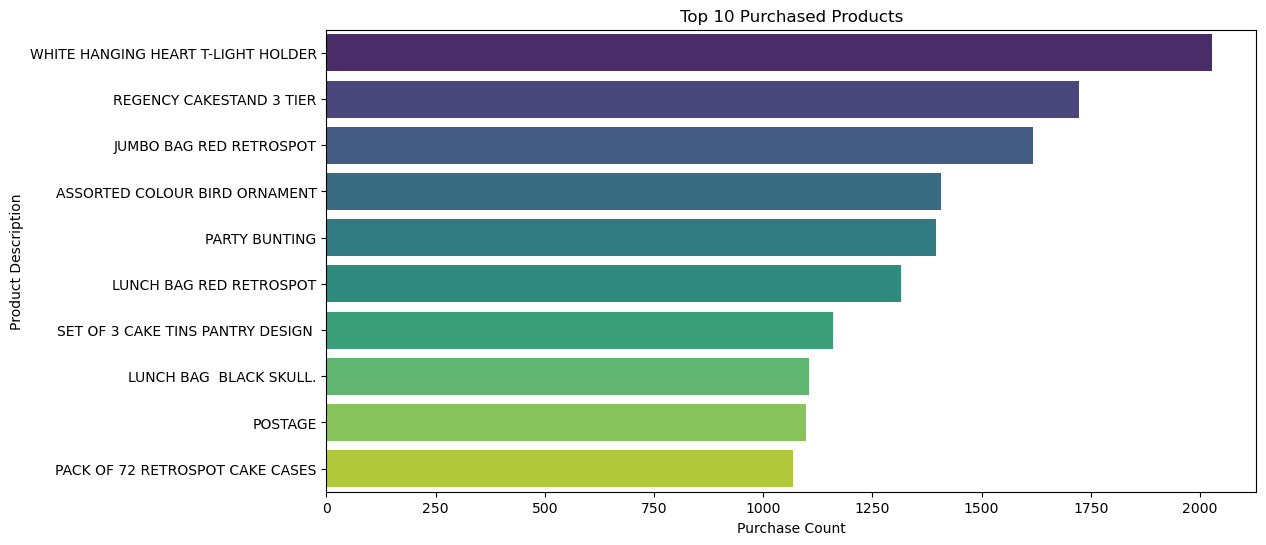

In [36]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Purchase Count")
plt.ylabel("Product Description")
plt.title("Top 10 Purchased Products")
plt.show()

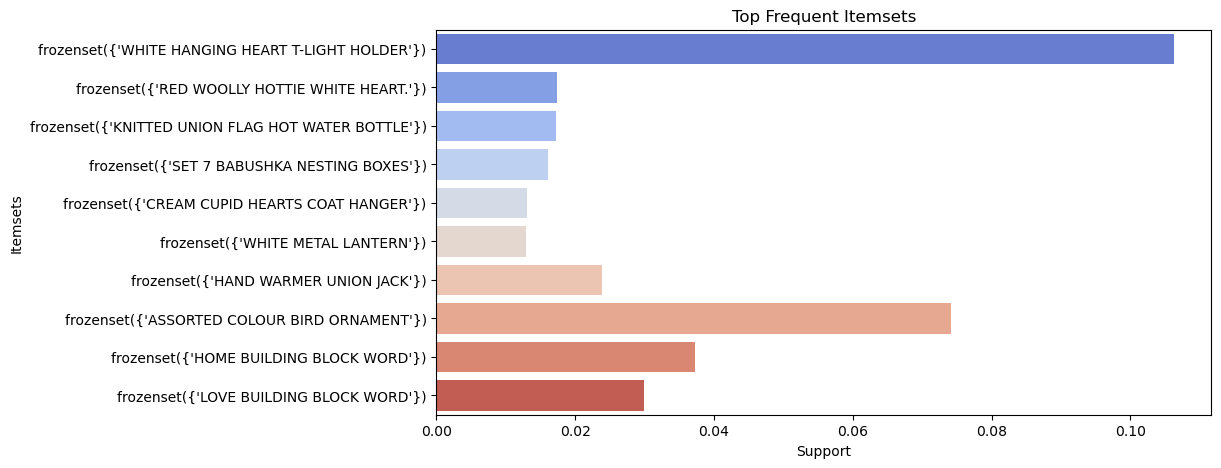

In [40]:
# Plot support values of frequent itemsets
plt.figure(figsize=(10, 5))
sns.barplot(x=frequent_itemsets["support"][:10], y=frequent_itemsets["itemsets"][:10].astype(str), palette="coolwarm")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.title("Top Frequent Itemsets")
plt.show()

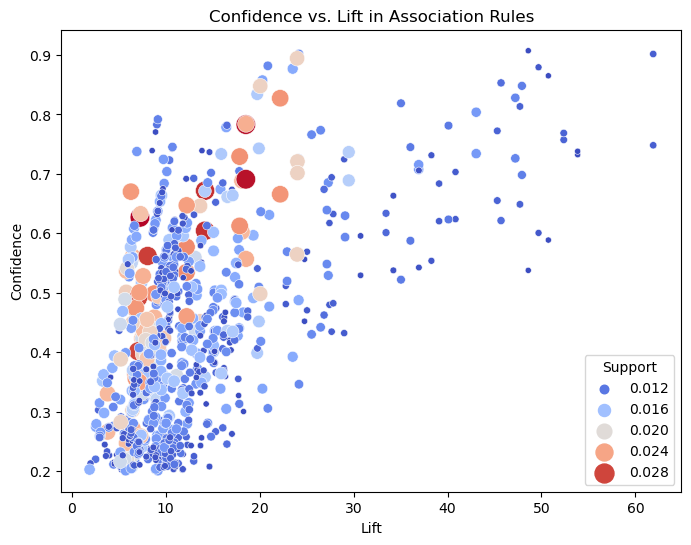

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rules["lift"], y=rules["confidence"], hue=rules["support"], size=rules["support"], palette="coolwarm", sizes=(20, 200))
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.title("Confidence vs. Lift in Association Rules")
plt.legend(title="Support")
plt.show()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       109
           1       0.69      0.70      0.70        57

    accuracy                           0.79       166
   macro avg       0.77      0.77      0.77       166
weighted avg       0.79      0.79      0.79       166



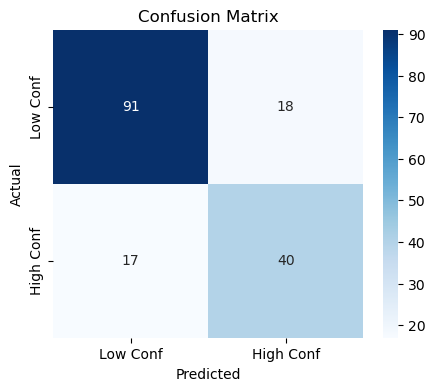

In [44]:
# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=["Low Conf", "High Conf"], yticklabels=["Low Conf", "High Conf"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [45]:
import random

In [46]:
def recommend_items(basket, rules, n_recommendations=3):
    matching_rules = rules[rules["antecedents"].apply(lambda x: any(item in x for item in basket))]
    
    if matching_rules.empty:
        return ["No recommendations"]
    
    sorted_rules = matching_rules.sort_values(by="confidence", ascending=False)
    recommendations = sorted_rules["consequents"].values[:n_recommendations]
    
    return list(random.choice(recommendations))

In [47]:
# Example usage
user_basket = ["WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN"]
print(f"Recommended products: {recommend_items(user_basket, rules)}")

Recommended products: ['RED HANGING HEART T-LIGHT HOLDER']


In [51]:
# Calculate FP-Growth only accuracy (baseline)
fp_only_accuracy = (rules["confidence"] > 0.5).mean()  # Fraction of rules with confidence > 0.5

# Random Forest Model Accuracy (already computed in the user's code)
rf_accuracy = accuracy

# Store results in a dictionary for comparison
accuracy_comparison = {
    "FP-Growth Only Accuracy": fp_only_accuracy,
    "FP-Growth + ML Accuracy": rf_accuracy
}

print(accuracy_comparison)

{'FP-Growth Only Accuracy': 0.330518697225573, 'FP-Growth + ML Accuracy': 0.7891566265060241}
